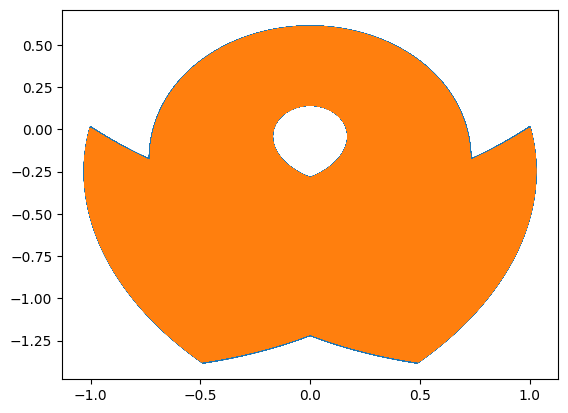

In [13]:
import numpy as np
import matplotlib.pyplot as plt

m = 1
M = 3
g = 9.81
time = 2000
N = 1000000
dt = time/N
T = dt * np.linspace(0, N, N)
def func(state):
    [r,t,pr,pt]=state
    rdot = pr / (M+m)
    tdot = pt / (m*r**2)
    prdot = (pt**2)/(m*r**3) - M*g + m*g*np.cos(t)
    ptdot = -m*g*r*np.sin(t)
    return [rdot,tdot,prdot,ptdot]
    
def simulation(r,t,pr,pt):
    frameT = []
    framer = []
    framet = []
    framex = []
    framey = []
    framepr = []
    framept = []
    for i in T:
        #Euler Method
        init=np.array([r,t,pr,pt])
        k1=np.array(func(init))
        k2=np.array(func(init+dt*k1/2))
        k3=np.array(func(init+dt*k2/2))
        k4=np.array(func(init+dt*k3))
        new = init + dt*(1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        [r,t,pr,pt]=new
        frameT.append(i)
        framer.append(r)
        framet.append(t)
        framepr.append(pr)
        framept.append(pt)
        framex.append(r*np.sin(t))
        framey.append(-r*np.cos(t))
    return frameT, framer, framet, framepr, framept, framex, framey

# ax = plt.plot(framet, framer)
# plt.xlabel("theta")
# plt.ylabel("r")
# plt.title("theta - r Graph (mu = 1.665, theta = pi/2, timestep = 10^-5)")
# plt.show()

T1, r1, t1, pr1, pt1, x1, y1 = simulation(1,np.pi/2+0.01,0,0)
plt.plot(x1, y1)
#plt.show()


T2, r2, t2, pr2, pt2, x2, y2 = simulation(1,np.pi/2,0,0)
plt.plot(x2,  y2)
# plt.plot(xx, yy)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Trajectory (mu = 1.675, theta = pi/2, timestep = 10^-5)")
plt.show()


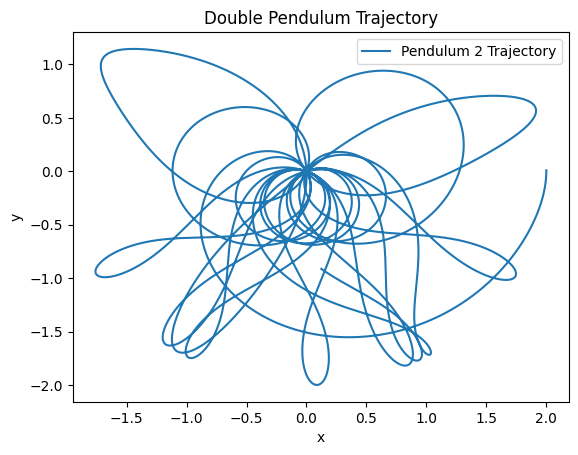

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m1, m2 = 1.0, 1.0   # Masses of the two pendulums
L1, L2 = 1.0, 1.0   # Lengths of the two rods
g = 9.81            # Gravitational acceleration

# Simulation parameters
time = 10            # Total simulation time
N = 10000            # Number of steps
dt = time / N
T = dt * np.linspace(0, N, N)

# Equations of motion for double pendulum
def func(state):
    theta1, theta2, p_theta1, p_theta2 = state

    delta_theta = theta2 - theta1
    denom1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta_theta)**2
    denom2 = (L2 / L1) * denom1

    theta1_dot = (p_theta1 * L2 - p_theta2 * L1 * np.cos(delta_theta)) / (L1**2 * denom1)
    theta2_dot = (p_theta2 * (m1 + m2) * L1 - p_theta1 * m2 * L2 * np.cos(delta_theta)) / (L2**2 * denom2)

    p_theta1_dot = -(m1 + m2) * g * L1 * np.sin(theta1) - theta1_dot * theta2_dot * m2 * L1 * L2 * np.sin(delta_theta)
    p_theta2_dot = -m2 * g * L2 * np.sin(theta2) + theta1_dot * theta2_dot * m2 * L1 * L2 * np.sin(delta_theta)

    return [theta1_dot, theta2_dot, p_theta1_dot, p_theta2_dot]

# Runge-Kutta simulation
def simulation(theta1, theta2, p_theta1, p_theta2):
    frameT, frameTheta1, frameTheta2, frameX1, frameY1, frameX2, frameY2 = [], [], [], [], [], [], []
    state = np.array([theta1, theta2, p_theta1, p_theta2])
    
    for t in T:
        k1 = np.array(func(state))
        k2 = np.array(func(state + dt * k1 / 2))
        k3 = np.array(func(state + dt * k2 / 2))
        k4 = np.array(func(state + dt * k3))
        
        state = state + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        theta1, theta2, p_theta1, p_theta2 = state
        
        # Calculate positions
        x1, y1 = L1 * np.sin(theta1), -L1 * np.cos(theta1)
        x2, y2 = x1 + L2 * np.sin(theta2), y1 - L2 * np.cos(theta2)

        # Store data for plotting
        frameT.append(t)
        frameTheta1.append(theta1)
        frameTheta2.append(theta2)
        frameX1.append(x1)
        frameY1.append(y1)
        frameX2.append(x2)
        frameY2.append(y2)
        
    return frameT, frameTheta1, frameTheta2, frameX1, frameY1, frameX2, frameY2

# Initial conditions: small perturbations
theta1_init, theta2_init = np.pi / 2, np.pi / 2 + 0.01
p_theta1_init, p_theta2_init = 0, 0

# Run simulation
T1, theta1_vals, theta2_vals, x1_vals, y1_vals, x2_vals, y2_vals = simulation(theta1_init, theta2_init, p_theta1_init, p_theta2_init)

# Plot the trajectory of the second pendulum
plt.plot(x2_vals, y2_vals, label="Pendulum 2 Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Double Pendulum Trajectory")
plt.legend()
plt.show()